# PCA and main components

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython.display import display
import mglearn
plt.rc('font', family='Verdana')
import matplotlib as mpl
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=1)

In [4]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


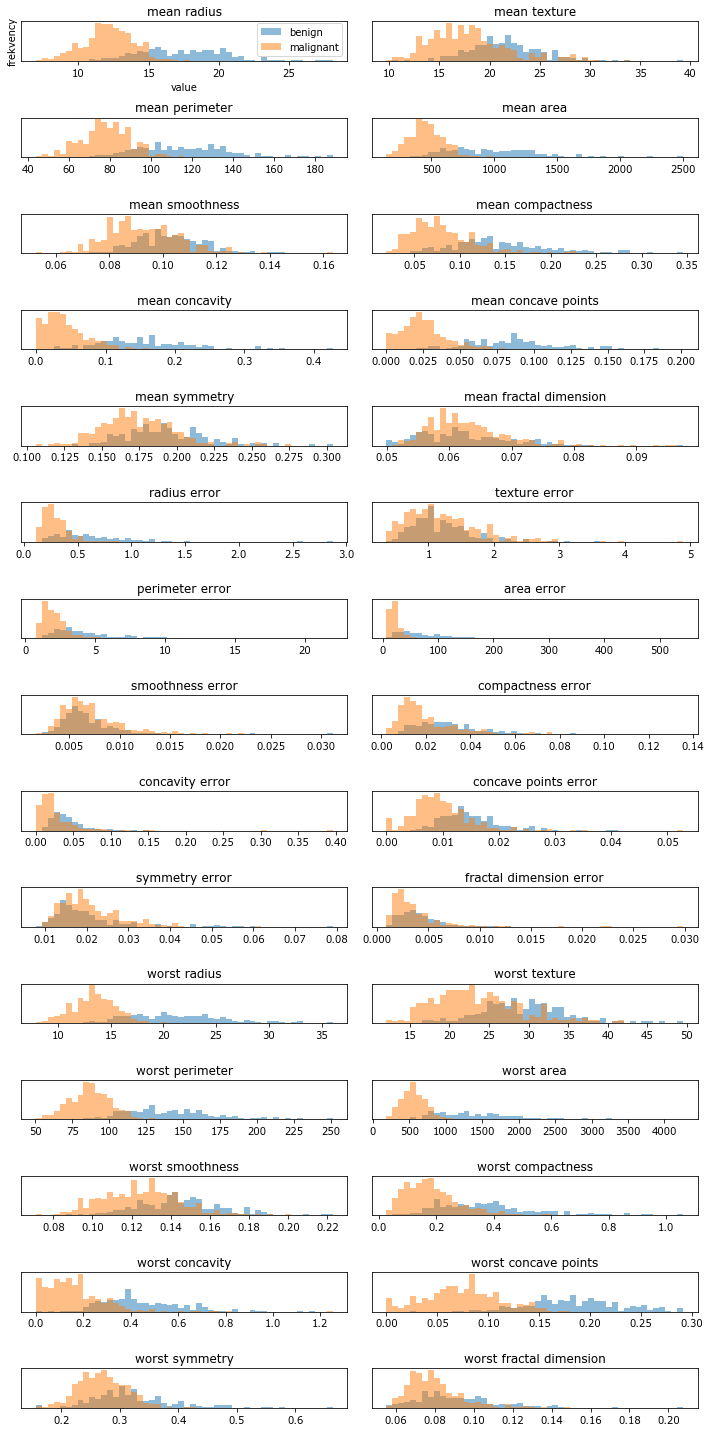

In [5]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("value")
    ax[0].set_ylabel("frekvency")

ax[0].legend(["benign", "malignant"], loc="best")
fig.tight_layout()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

In [7]:
from sklearn.decomposition import PCA

# leave 2 main components
pca= PCA(n_components=2)

# fitting pca on breast cancer
pca.fit(X_scaled)

# transform data to 2 main components
X_pca = pca.transform(X_scaled)
print("starting array shape: {}".format(str(X_scaled.shape)))
print("shape after transformation: {}".format(str(X_pca.shape)))

starting array shape: (569, 30)
shape after transformation: (569, 2)


In [35]:
def discrete_scatter(x1, x2, y, markeredgewidth=None):
    #Adaption of matplotlib.pyplot.scatter to plot classes or clusters.
    s=10
    padding=.2
    alpha=1
    ax = plt.gca()
    unique_y = np.unique(y)
    markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10
    labels = unique_y
    

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        color = cycle['color']
        
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor)[0])

    pad1 = x1.std() * padding
    pad2 = x2.std() * padding
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
    ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lines

In [36]:
cm_cycle = ListedColormap(['#0000aa', '#ff5050', '#50ff50', '#9040a0', '#fff000'])
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

# create a smooth transition from the first to to the second color of cm3
# similar to RdBu but with our red and blue, also not going through white,
# which is really bad for greyscale

cdict = {'red': [(0.0, 0.0, cm2(0)[0]),
                 (1.0, cm2(1)[0], 1.0)],

         'green': [(0.0, 0.0, cm2(0)[1]),
                   (1.0, cm2(1)[1], 1.0)],

         'blue': [(0.0, 0.0, cm2(0)[2]),
                  (1.0, cm2(1)[2], 1.0)]}

ReBl = LinearSegmentedColormap("ReBl", cdict)

Text(0, 0.5, 'second main component')

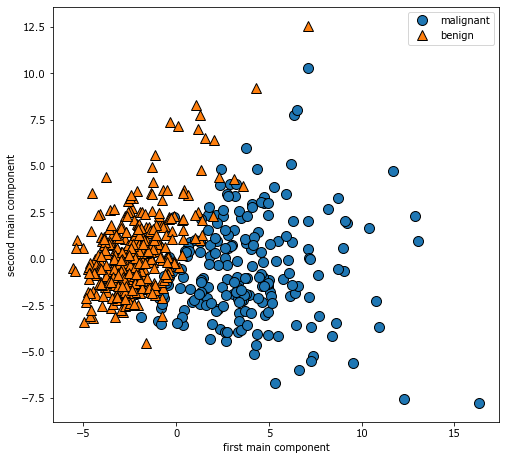

In [37]:
plt.figure(figsize=(8, 8))
discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("first main component")
plt.ylabel("second main component")

In [ ]:
print("PCA components:\n{}".format(pca.components_))

Text(0, 0.5, 'main components')

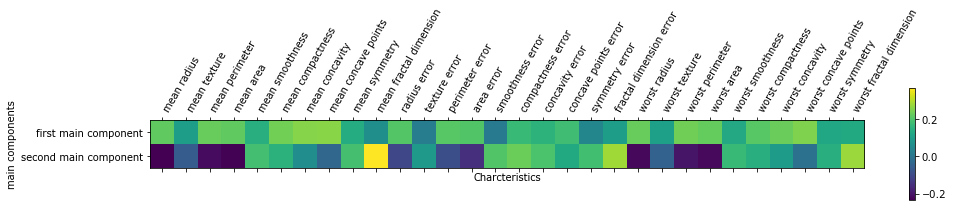

In [9]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first main component", "second main component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Charcteristics")
plt.ylabel("main components")